#### RNN의 many to many 구조에 대한 간단 예



```
model = nn.RNN(input_size, hidden_size,num_layers,batch_frist=True)
output, h_n = model(input)
```

- input_size : input의 feature수
- hidden_size :  은닉상태의 feature 수
- num_layers : 은닉층의 수 / num_layers가 2 이상이면 다층 RNN(Multi-layer RNN)이 됨.
- batch_frist : input 텐서와 output 텐서 형태에서 batch_size의 위치에 대한 옵션
    - True이면 batch가 맨 앞에 위치함.

- input 텐서의 형태는 (batch_size, sequence_length, input_size) 순서

- output 텐서의 형태는 (batch_size, sequence_length, num_directions *hidden_size) 순서
    - num_directions은 방향의 수를 나타냄. Bidirectional RNN을 제외하고는 1이다.
    - batch_first 옵션은 은닉상태의 형태에는 적용되지는 않음.



- nn.RNN의 출력에는 output, h_n이 있음.
    - output은 모든 타임 스텝에 대한 결과이고, h_n은 t=n인 마지막 타임 스텝에 대한 은닉 상태 값이다.
    - h_n 형태는 (num_layers * num_directions, batch_size, hidden_size)이다.
    - 이것은 batch_first=True 지정유무와 무관하다.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

data = [[[1],[2],[3],[4],[5]],
        [[6],[7],[8],[9],[10]],
        [[11],[12],[13],[14],[15]],
        [[16],[17],[18],[19],[20]]]

inputs = torch.FloatTensor(np.array(data))

INPUT_SIZE=1
SEQUENCE_LENGTH=5
HIDDEN_SIZE = 2
NUM_LAYERS=1
BACTH_SIZE=4

torch.manual_seed(0) #reproduclibility
model = nn.RNN(input_size= INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, batch_first = True)
#input_size : (batch, seq_len, input_size)
#output size : (batch,seq_len, num_directions*hidden_size)
#h_n shape : (num_layers * num_directions, batch, hidden_size)
output, h_n = model(inputs)

print('Input : ', inputs.shape, '\n', inputs)
print('\noutput : ', output.shape, '\n', output)
print('\nhidden : ', h_n.shape, '\n', h_n)

Input :  torch.Size([4, 5, 1]) 
 tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]]])

output :  torch.Size([4, 5, 2]) 
 tensor([[[-0.0819,  0.8100],
         [-0.4311,  0.9332],
         [-0.3162,  0.9748],
         [-0.3979,  0.9875],
         [-0.3675,  0.9944]],

        [[-0.1081,  0.9953],
         [-0.5145,  0.9986],
         [-0.3269,  0.9995],
         [-0.4254,  0.9997],
         [-0.3820,  0.9999]],

        [[-0.1342,  0.9999],
         [-0.5245,  1.0000],
         [-0.3458,  1.0000],
         [-0.4382,  1.0000],
         [-0.3982,  1.0000]],

        [[-0.1601,  1.0000],
         [-0.5328,  1.0000],
         [-0.3648,  1.0000],
         [-0.4506,  1.0000],
         [-0.4143,  1.0000]]], grad_fn=<Transpo

- nn.RNN 함수에서 batch_first=True이므로, 형태는 (batch_size, sequence_length, input_size) = (4,5,1)이고, 출력 데이터 형태도 (batch,sequence_length, num_direction *hidden_size) = (4,5,2) / 은닉상태의 형태는 batch_first=True는 지정과 무관하게 (num*layers * num_directions, batch, hidden_size) = (1,4,2)

- 위는 20개의 데이터를 nn.RNN 클래스에서 원하는 형태에 맞추어 미리 변환한 후 모델 구축에 사용함.

- 이번에는 20개의 데이터를 view()함수에 의해 원하는 형태로 변환한 후 RNN 모델을 구축해보자.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

data = torch.Tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#print('Data : ', data.shape, '\n', data)

INPUT_SIZE=1
SEQUENCE_LENGTH=5
HIDDEN_SIZE = 2
NUM_LAYERS=1
BACTH_SIZE=4

torch.manual_seed(0) #reproduclibility
model = nn.RNN(input_size= INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, batch_first = True)
#input_size : (batch, seq_len, input_size)
input = data.view(BACTH_SIZE,SEQUENCE_LENGTH,INPUT_SIZE)
#output size : (batch,seq_len, num_directions*hidden_size)
#h_n shape : (num_layers * num_directions, batch, hidden_size)
output, h_n = model(input)

print('Input : ', input.shape, '\n', input)
print('\noutput : ', output.shape, '\n', output)
print('\nhidden : ', h_n.shape, '\n', h_n)

Input :  torch.Size([4, 5, 1]) 
 tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]]])

output :  torch.Size([4, 5, 2]) 
 tensor([[[-0.0819,  0.8100],
         [-0.4311,  0.9332],
         [-0.3162,  0.9748],
         [-0.3979,  0.9875],
         [-0.3675,  0.9944]],

        [[-0.1081,  0.9953],
         [-0.5145,  0.9986],
         [-0.3269,  0.9995],
         [-0.4254,  0.9997],
         [-0.3820,  0.9999]],

        [[-0.1342,  0.9999],
         [-0.5245,  1.0000],
         [-0.3458,  1.0000],
         [-0.4382,  1.0000],
         [-0.3982,  1.0000]],

        [[-0.1601,  1.0000],
         [-0.5328,  1.0000],
         [-0.3648,  1.0000],
         [-0.4506,  1.0000],
         [-0.4143,  1.0000]]], grad_fn=<Transpo

- 언어 모델
    - 순차적으로 입력된 자료를 바탕으로 다음에 나올 단어(word)나 문자(character)를 예측하는 모델로 자연어 처리나 음성인식 분야에 활용되고 있다.
    - 단어(word)를 기반으로 학습하는 단어-레벨 언어 모델(word-level language model) 과 문자(character)를 기반으로 학습하는 문자-레벨 언어 모델(word-level language model)이 있다.

- epoch이 증가할수록 손실함수 값이 작아지면서 RNN 모델은 목표값을 잘 예측함을 알 수 있다.

- hell에 해당되는 숫자 데이터 x_data, 'hell'에 해당되는 원-핫 인코딩 표현 x_one_hot, 그리고 'hell'에 대한 목표값 y_data에 대한 코드

In [ ]:
x_data=[[0,1,2,2]] #hell
#batch_size=1
x_one_hot = [[[1,0,0,0], #h
             [0,1,0,0],#e
             [0,0,1,0], #l
             [0,0,1,0]]] #l
y_data = [[1,2,2,3]] #ello

- nn.RNN 함수에서 인자 결정
    - input_size를 정한다. 여기서는 input_size=4
    - hidden_size를 정하기 위해서는 nn.RNN함수에서 outputs의 형태를 고려해야한다. 
    - 출력이 하나는 outputs로 하고 다른 하나는 다음 타임 스텝에서 hidden_state로 들어가기 때문이다.

In [ ]:
char_set = ['h','e','l','o']
input_size = len(char_set) #=4
hidden_size = len(char_set) #=4
num_layers=1

- 배열을 텐서로 변환


In [ ]:
#transform as torch tensor
inputs = torch.FloatTensor(x_one_hot)
labels = torch.LongTensor(y_data)
print('입력 데이터의 크기 : {}'.format(inputs.shape))
print('레이블의 크기 : {}'.format(labels.shape))

입력 데이터의 크기 : torch.Size([1, 4, 4])
레이블의 크기 : torch.Size([1, 4])


- 입력 데이터의 형태는 [1,4,4]는 (batch_size, sequence_length, input_size)이다.

- RNN 모델 생성
    - batch_first이면, 입력 데이터의 크기는 (bacth_size, sequence_length, input_size) 순서가 된다.

In [ ]:
#declare RNN
#batch_first gruarantees the order=(batch_size,sequence_length,input_size)
rnn = torch.nn.RNN(input_size, hidden_size,num_layers, batch_first=True) #batch_first guarantees the order of ouput = (B, S, F)
print(rnn)

RNN(4, 4, batch_first=True)


- 손실함수와 최적화 방법 선택

In [ ]:
#loss & optimizer setting
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.1)

- RNN 모델 학습

In [ ]:
for i in range(20):
  outputs, _ = rnn(inputs)
  loss = loss_function(outputs.view(-1, input_size), labels.view(-1))
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  #print(outputs)
  result = outputs.data.numpy().argmax(axis=2)
  #print(result)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  #print(result_str)
  print('epoch=',i+1,',', "loss: ", round(loss.item(),4),',', "pred: ", result_str)

epoch= 1 , loss:  1.3764 , pred:  eeeo
epoch= 2 , loss:  1.1519 , pred:  elee
epoch= 3 , loss:  1.0187 , pred:  elll
epoch= 4 , loss:  0.9007 , pred:  ello
epoch= 5 , loss:  0.8291 , pred:  ello
epoch= 6 , loss:  0.7649 , pred:  ello
epoch= 7 , loss:  0.7002 , pred:  ello
epoch= 8 , loss:  0.6456 , pred:  ello
epoch= 9 , loss:  0.6024 , pred:  ello
epoch= 10 , loss:  0.5628 , pred:  ello
epoch= 11 , loss:  0.534 , pred:  ello
epoch= 12 , loss:  0.5119 , pred:  ello
epoch= 13 , loss:  0.4961 , pred:  ello
epoch= 14 , loss:  0.4855 , pred:  ello
epoch= 15 , loss:  0.4748 , pred:  ello
epoch= 16 , loss:  0.4678 , pred:  ello
epoch= 17 , loss:  0.4591 , pred:  ello
epoch= 18 , loss:  0.4537 , pred:  ello
epoch= 19 , loss:  0.4468 , pred:  ello
epoch= 20 , loss:  0.4425 , pred:  ello




```
loss = loss_function(outputs.view(-1, input_size).labels.view(-1)
```

- nn.CrossEntropyLoss()함수를 사용하여 손실함수를 계산하는 경우 nn.CrossEntropyLoss()함수는 2개의 텐서 인자를 받는다.

- 하나는 예측된 output값이고 다른 하나는 목표값이다. (인자들의 데이터 형태에 주의해야 한다, 그 이유는 데이터 형태가 서로 맞지 않은 경우 오류가 발생하기 때문이다.)

- 현재 outputs.view(-1,input_size)의 형태는 [4,4]이고 y.view(-1)의 형태는 [4]이다. 이처럼 nn.CrossEntropyLoss()함수의 인자로서 outputs.view(-1, input_size)의 형태가 [4,?]인 경우 y.view(-1)의 형태는 [4]가 되어야 한다.



In [ ]:
#declare RNN
#batch_first gruarantees the order=(batch_size,sequence_length,input_size)
rnn = torch.nn.RNN(input_size, hidden_size,num_layers, batch_first=True) #batch_first guarantees the order of ouput = (B, S, F)
outputs, _ = rnn(inputs)
print(outputs.view(-1, input_size).shape)
print(labels.view(-1).shape)

#loss = loss_function(outputs.view(-1, input_size),label_view(-1))

torch.Size([4, 4])
torch.Size([4])




```
result = outputs.data.numpy().argmax(axis=2)

```
- 최댓값이 있는 인덱스를 구하는 함수.
    - 2차원 배열인 경우 axis=0이면 열, axis=1이면 행을 기준으로 계산.
    - 3차원 배열인 경우 axis=1이면 열, axis=2이면 행을 기준으로 계산한다.
    


In [ ]:
print(outputs)
result = outputs.data.numpy().argmax(axis=2)
print(result)

tensor([[[ 0.2983, -0.1935,  0.2680, -0.1059],
         [ 0.6007,  0.3669, -0.1000, -0.3462],
         [-0.3116,  0.0516,  0.0056, -0.4168],
         [ 0.1862, -0.0535,  0.2869, -0.2876]]], grad_fn=<TransposeBackward1>)
[[0 0 1 2]]


- numpy.argmax()함수와 유사한 numpy.max()함수가 있다. 사용 예를 한번 봐보자.

In [ ]:
import numpy as np

arr = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
print('array=\n', arr)
print('dimension',arr.ndim)
print('argmax:', arr.argmax(axis=1))
print('max:',arr.max(axis=1))

array=
 [[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]
dimension 2
argmax: [3 3 3]
max: [ 4  7 10]


- 3차원 배열에서 numpy.argmax()함수와 numpy.max()함수의 사용 예

In [ ]:
import numpy as np

import numpy as np

arr = np.array([[[1,2,3,4],[4,5,6,7],[7,8,9,10]]])
print('array=\n', arr)
print('dimension',arr.ndim)
print('argmax:', arr.argmax(axis=2))
print('max:',arr.max(axis=2))

array=
 [[[ 1  2  3  4]
  [ 4  5  6  7]
  [ 7  8  9 10]]]
dimension 3
argmax: [[3 3 3]]
max: [[ 4  7 10]]


In [ ]:
print(result)
print(np.squeeze(result))
print([char_set[c] for c in np.squeeze(result)])
result_str = ''.join([char_set[c] for c in np.squeeze(result)])
print(result_str)

[[0 0 1 2]]
[0 0 1 2]
['h', 'h', 'e', 'l']
hhel


In [ ]:
|#word level language model
import torch
import numpy as np
import torch.optim as optim

torch.manual_seed(0) #reproduclibility

char_set = ['h','e','l','o']
input_size = len(char_set) #=4
hidden_size = len(char_set) #=4
num_layers=1

x_data=[[0,1,2,2]] #hell
#batch_size=1
x_one_hot = [[[1,0,0,0], #h
             [0,1,0,0],#e
             [0,0,1,0], #l
             [0,0,1,0]]] #l
y_data = [[1,2,2,3]] #ello

#transform as torch tensor
inputs = torch.FloatTensor(x_one_hot)
labels = torch.LongTensor(y_data)
print('입력 데이터의 크기 : {}'.format(inputs.shape))
print('레이블의 크기 : {}'.format(labels.shape))

#declare RNN
#batch_first gruarantees the order=(batch_size,sequence_length,input_size)
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) #batch_first guarantees the order of ouput = (B, S, F)

#loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.1)

#start training

for i in range(20):
  outputs, _ = rnn(inputs)
  loss = criterion(outputs.view(-1, input_size), labels.view(-1))
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  #print(outputs)
  result = outputs.data.numpy().argmax(axis=2)
  #print(result)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  #print(result_str)
  print('epoch=',i+1,',', "loss: ", round(loss.item(),4),',', "pred: ", result_str)

입력 데이터의 크기 : torch.Size([1, 4, 4])
레이블의 크기 : torch.Size([1, 4])
epoch= 1 , loss:  1.1658 , pred:  elll
epoch= 2 , loss:  0.9308 , pred:  llll
epoch= 3 , loss:  0.816 , pred:  lllo
epoch= 4 , loss:  0.7669 , pred:  lloo
epoch= 5 , loss:  0.7018 , pred:  lllo
epoch= 6 , loss:  0.6431 , pred:  ello
epoch= 7 , loss:  0.5951 , pred:  ello
epoch= 8 , loss:  0.5559 , pred:  ello
epoch= 9 , loss:  0.5248 , pred:  ello
epoch= 10 , loss:  0.5012 , pred:  ello
epoch= 11 , loss:  0.4836 , pred:  ello
epoch= 12 , loss:  0.469 , pred:  ello
epoch= 13 , loss:  0.4572 , pred:  ello
epoch= 14 , loss:  0.4503 , pred:  ello
epoch= 15 , loss:  0.4463 , pred:  ello
epoch= 16 , loss:  0.4414 , pred:  ello
epoch= 17 , loss:  0.437 , pred:  ello
epoch= 18 , loss:  0.4338 , pred:  ello
epoch= 19 , loss:  0.4284 , pred:  ello
epoch= 20 , loss:  0.4232 , pred:  ello


In [ ]:
#word level language model
import torch
import numpy as np
import torch.optim as optim

torch.manual_seed(0) #reproduclibility

#hyperparameters
learning_rate=0.1
num_epochs=20

char_set = ['h','e','l','o']

#Teach hello:hell->ello
x_data=[[0,1,2,2]] #hell
#batch_size=1
x_one_hot = [[[1,0,0,0], #h
             [0,1,0,0],#e
             [0,0,1,0], #l
             [0,0,1,0]]] #l
y_data = [[1,2,2,3]] #ello

#As we have one batch of samples, we will change them to variabels only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)
num_classes = 4
input_size=4 #one-hot size
hidden_size=4 #output from the RNN. 4 to directly predict one-hot
num_layers = 1


class RNN(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN,self).__init__()
        self.num_classes = num_classes
        self.input_size  = input_size
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out, _ = self.rnn(x)
        #Reshape output from (bacth, seq_len, hidden_size) to (batch*seq_len, hidden_size)
        out = out.view(-1, self.hidden_size)
        #Return outputs applied to fully connected layer
        out = self.fc(out)
        return out


#Instantiate RNN Model
rnn = RNN(num_classes, input_size, hidden_size, num_layers)
#Set loss & optimizer  function
loss_function = torch.nn.CrossEntropyLoss() #Softmax is internally computed.
optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)

#Tran the model
for epoch in range(num_epochs):
  outputs = rnn(inputs)
  loss = loss_function(outputs, labels.view(-1))
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  result = outputs.data.numpy().argmax(axis=1)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  print('epoch=',epoch+1,',', "loss: ", round(loss.item(),4),',', "pred =  ", ''.join(result_str)) #ello

epoch= 1 , loss:  1.688 , pred =   hhhh
epoch= 2 , loss:  1.3476 , pred =   hlll
epoch= 3 , loss:  1.1333 , pred =   llll
epoch= 4 , loss:  1.0257 , pred =   llll
epoch= 5 , loss:  0.9769 , pred =   llll
epoch= 6 , loss:  0.931 , pred =   llll
epoch= 7 , loss:  0.8573 , pred =   llll
epoch= 8 , loss:  0.7595 , pred =   elll
epoch= 9 , loss:  0.6604 , pred =   elll
epoch= 10 , loss:  0.5792 , pred =   elll
epoch= 11 , loss:  0.5104 , pred =   elll
epoch= 12 , loss:  0.4391 , pred =   ello
epoch= 13 , loss:  0.3983 , pred =   ello
epoch= 14 , loss:  0.3603 , pred =   ello
epoch= 15 , loss:  0.3088 , pred =   ello
epoch= 16 , loss:  0.2781 , pred =   ello
epoch= 17 , loss:  0.2522 , pred =   ello
epoch= 18 , loss:  0.2101 , pred =   ello
epoch= 19 , loss:  0.1761 , pred =   ello
epoch= 20 , loss:  0.146 , pred =   ello


In [ ]:
#word level language model
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device', device)

torch.manual_seed(0) #reproduclibility

#hyperparameters
learning_rate=0.1
num_epochs=20

input_str = 'hell'
label_str = 'ello'

char_set = list(set(input_str+label_str))
#print(char_set)
#char_set = ['h','e','l','o']

input_size = len(char_set) # RNN input size(one hot size)
hidden_size = len(char_set) # RNN Output size
num_classes = len(char_set) # final output size (RNN or softamx, etc.)
num_layers = 1
#batch_size = 1 #one sentence

char_to_index = dict((c,i) for i,c in enumerate(char_set)) #문자에 고유한 정수 인덱스 부여
#print(char_to_index)

#1차원 리스트

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
#print(x_data)
#print(y_data)

#2차원 리스트
#텐서 연산인 unsqueeze(0)을 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
#print(x_data)
#print(y_data)

for x in x_data:
    x_one_hot = [np.eye(input_size)[x]]
#print(x_one_hot)
#As we have one batch of samples, we will change them the variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)
inputs = inputs.to(device)
label = labels.to(device)

class RNN(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN,self).__init__()
        self.num_classes = num_classes
        self.input_size  = input_size
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out, _ = self.rnn(x)
        #Reshape output from (bacth, seq_len, hidden_size) to (batch*seq_len, hidden_size)
        out = out.view(-1, self.hidden_size)
        #Return outputs applied to fully connected layer
        out = self.fc(out)
        return out
#Instantiate RNN Model
rnn = RNN(num_classes, input_size, hidden_size, num_layers)
#Set loss & optimizer  function
loss_function = torch.nn.CrossEntropyLoss() #Softmax is internally computed.
optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)

#Tran the model
for epoch in range(num_epochs):
  outputs = rnn(inputs)
  loss = loss_function(outputs, labels.view(-1))
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  result = outputs.data.numpy().argmax(axis=1)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  print('epoch=',epoch+1,',', "loss: ", round(loss.item(),4),',', "pred =  ", ''.join(result_str)) #ello

Device cpu
epoch= 1 , loss:  1.5623 , pred =   eeee
epoch= 2 , loss:  1.1786 , pred =   elll
epoch= 3 , loss:  1.0232 , pred =   llll
epoch= 4 , loss:  0.9527 , pred =   llll
epoch= 5 , loss:  0.891 , pred =   llll
epoch= 6 , loss:  0.804 , pred =   llll
epoch= 7 , loss:  0.6936 , pred =   elll
epoch= 8 , loss:  0.588 , pred =   elll
epoch= 9 , loss:  0.502 , pred =   elll
epoch= 10 , loss:  0.4263 , pred =   ello
epoch= 11 , loss:  0.3486 , pred =   ello
epoch= 12 , loss:  0.2792 , pred =   ello
epoch= 13 , loss:  0.2243 , pred =   ello
epoch= 14 , loss:  0.1786 , pred =   ello
epoch= 15 , loss:  0.1419 , pred =   ello
epoch= 16 , loss:  0.1138 , pred =   ello
epoch= 17 , loss:  0.0918 , pred =   ello
epoch= 18 , loss:  0.0742 , pred =   ello
epoch= 19 , loss:  0.0601 , pred =   ello
epoch= 20 , loss:  0.0488 , pred =   ello


- Airline Passengers
    - 1949년 1월부터 1960년 1`2월까지 매달 국제선 승객의 수에 대한 데이터.

In [ ]:
#load data
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-05-21 01:50:13--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-21 01:50:13 (30.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [ ]:
#load package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

- Data

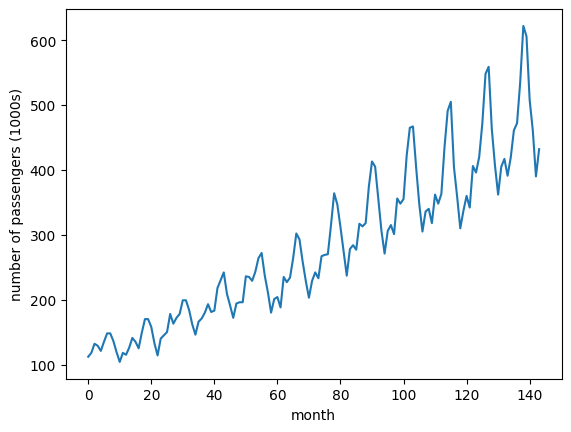

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')

training_set = training_set.iloc[:,1:2].values

plt.xlabel('month')
plt.ylabel('number of passengers (1000s)')
plt.plot(training_set)
plt.show()

- 시계열 데이터이므로 몇 개의 타임스텝을 현재 시점에 반영할 것 인지 정합니다.

- 즉, 현재 시점의 값은 지정한 시퀀스 길이에 맞게 직전 몇 개의 값과 연관되게끔 데이터를 재구성하는 것.

In [ ]:

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.30)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print(training_data.shape)
print(dataX.shape)
print(dataY.shape)
print(trainX.shape)
print(trainY.shape)

(144, 1)
torch.Size([139, 4, 1])
torch.Size([139, 1])
torch.Size([41, 4, 1])
torch.Size([41, 1])


### Model

이제는 시계열 데이터 모델링을 위한 LSTM 모델을 구현해줄 차례입니다. LSTM (Long Short-Term Memory) 는 입력 시퀀스의 타임 스텝 $t$에 따라 hidden state $h_t$, cell state $c_t$에 따른 출력을 Equation 1과 같이 계산합니다. Equation 1의 $i_t, f_t, g_t, o_t$는 각각 input, forget, cell, output 게이트이며 $\sigma$는 sigmoid 함수를 말합니다.


<img src='https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_W640.jpg'>

Pytorch 에서는 torch.nn 모듈에서 LSTM 클래스를 쉽게 호출할 수 있습니다. LSTM 클래스 생성시 필요한 파라미터는 다음과 같습니다. "num_layer" 아규먼트를 통해 Multi-layer LSTM을 쉽게 구성할 수 있으며 "num_layer"가 2 이상일 경우, 타임스텝 $t$, layer $l$에 대한 입력으로는 ($x_t^l, l \geq 2$) $h_t^{l-1}$에 dropout이 적용된 텐서가 적용됩니다.

- input_size : 입력 $x$의 feature차원
- hidden_size : hidden_feature 차원
- num_layers : LSTM 층의 개수로 2개 이상일 경우 bais항을 추가할지 말지를 결정.
- bias : default : True / bais 항을 추가할지 말지를 결정.
- batch_frist : default : False, True일 경우 입력, 출력 모두 [배치사이즈, 입력 길이, feature 차원] 으로 구성되고 fasle일 경우 입력, 출력 모두 [입력 길이, 배치 사이즈, feature 차원]이 됨. 이러한 텐서 차원 순서는 hidden/cell state에는 적용되지 않습니다.

- dropout : 마지막 layer의 출력을 제외하고 dropout을 적용함.

LSTM 모델을 사용할 때 주의할 점은 각 타임스텝 별로 hidden / cell state 가 업데이트되는 구조로 동작하기 때문에 초기 $h_0, c_0$를 목적에 맞게 선언해줄 수 있다는 점입니다 각각 [$D$*num_layers, 배치 사이즈, feature 차원] 크기로 되어있고 $D$는 bi-directional 일 경우 2, one-directional 일 경우 1이고 따로 제공되지 않을 경우 디폴트는 0으로 할당됩니다. 또한, 입력, 출력의 텐서 구조는 "batch_first" 아규먼트가 True / False 여부에 따라 배치 차원이 어디에 위치할지 결정됩니다. 일반적으로 배치 차원은 맨 앞에 있는 것이 편리하므로 "batch_first=True"로 설정하는 것이 낫습니다.

LSTM 모델에 대해서 forward 함수를 진행할 경우 출력은 "output, $(h_n, c_n)$" 이 됩니다. 출력텐서는 ("output") "batch_first" 아규먼트에 따라 True일 경우 [배치 사이즈, 입력 길이, $D$*feature 차원] 으로 구성되며 각 타임스텝 $t$에 따른 마지막 LSTM layer의 $h_t$를 담습니다. $h_n, c_n$의 크기는 [$D$*num_layers, 배치 사이즈, feature 차원] 으로 구성되며 마지막 타임스텝의 hidden / cell state가 담깁니다

In [ ]:

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

- $h_0, c_0$는 hidden / cell state의 초기값이기 때문에 requires_grad=False로 설정된 zero 텐서를 넣어줍니다.
- 현재 시퀀스 길이는 4이고 마지막 시퀀스에 대해 fully-connected layer를 달아주고 싶기 때문에 $h_n$에 대하여 fully-connected layer를 진행시킵니다. 
LSTM 모델의 결과로 나오는 "output"의 마지막 타임스텝 값은 $h_n$과 같습니다.

#### Train

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))



Epoch: 0, loss: 0.23084
Epoch: 100, loss: 0.00385
Epoch: 200, loss: 0.00320
Epoch: 300, loss: 0.00253
Epoch: 400, loss: 0.00180
Epoch: 500, loss: 0.00125
Epoch: 600, loss: 0.00108
Epoch: 700, loss: 0.00104
Epoch: 800, loss: 0.00102
Epoch: 900, loss: 0.00100
Epoch: 1000, loss: 0.00098
Epoch: 1100, loss: 0.00097
Epoch: 1200, loss: 0.00095
Epoch: 1300, loss: 0.00094
Epoch: 1400, loss: 0.00092
Epoch: 1500, loss: 0.00091
Epoch: 1600, loss: 0.00090
Epoch: 1700, loss: 0.00088
Epoch: 1800, loss: 0.00088
Epoch: 1900, loss: 0.00087


#### Test

- 테스트 진행 시에는 전에 선언했던 "MinMaxScaler" 객체의 "inverse_transform" 함수를 이용하여 원래 데이터 값으로 복원시킵니다.

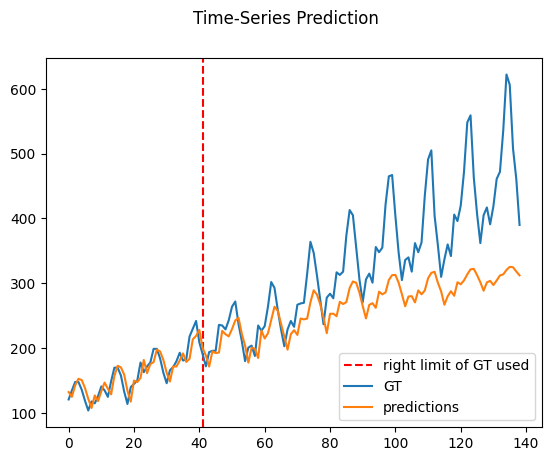

In [ ]:
lstm.eval()

# predict on training and test data
all_predict = lstm(dataX)

data_predict = all_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--', label='right limit of GT used')

plt.plot(dataY_plot, label='GT')
plt.plot(data_predict, label='predictions')
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()
     


- 참고) https://hongl.tistory.com/194



- torchtext는 자연어 처리(NLP)분야에서 사용되는 dataloader, torchtext는 파일 가져오기, 토큰화, 단어 집합, 생성, 인코딩, 단어 벡터 생성 등의 작업을 지원하기 때문에 자연어 처리에서 많이 사용되고 있음.

In [ ]:
!pip install torchtext==0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [ ]:
# 라이브러리 임포트
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import datasets, data # 자연어 데이터셋을 다루기 위해 토치비전이 아닌 토치 텍스트를 사용합니다.

# 하이퍼파라미터 정의
BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", DEVICE)

다음 기기로 학습합니다: cuda


In [ ]:
# 데이터 로딩하기
# 텍스트 형태의 영화 리뷰들과 그에 해당하는 리뷰들을 텐서로 바꿔주기
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
# sequential = True : 데이터셋이 순차적인 데이터셋임을 명시
# batch_first = True : 신경망에 입력되는 텐서의 첫 번째 차원값을 batch size로 지정
# lower = True : 텍스트 데이터 속 모든 영문 알파벳이 소문자가 되도록 처리
LABEL = data.Field(sequential=False, batch_first=True) #Label은 순차적 데이터가 아님
trainset, testset = datasets.IMDB.splits(TEXT, LABEL) # train test 분리
TEXT.build_vocab(trainset, min_freq=5) # 워드 임베딩에 필요한 단어 사전(word vocabulary) 만들기
# min_freq = 5 : 학습 데이터에서 최소 5번 이상 등장한 단어만을 사전에 담음
LABEL.build_vocab(trainset)

# 학습용 데이터를 학습셋 80% 검증셋 20% 로 나누기
trainset, valset = trainset.split(split_ratio=0.8)
train_iter, val_iter, test_iter = data.BucketIterator.splits(
        (trainset, valset, testset), batch_size=BATCH_SIZE,
        shuffle=True, repeat=False)


vocab_size = len(TEXT.vocab) #사전 속 단어들의 개수와 레이블 수 지정
n_classes = 2

print("[학습셋]: %d [검증셋]: %d [테스트셋]: %d [단어수]: %d [클래스] %d"
      % (len(trainset),len(valset), len(testset), vocab_size, n_classes))

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:02<00:00, 34.6MB/s]


[학습셋]: 20000 [검증셋]: 5000 [테스트셋]: 25000 [단어수]: 46159 [클래스] 2


- RNN의 입력이 길어지면 기울기(경사도) 폭발(gradient explosion) 혹은 기울기(경사도) 소실(vanishing gradient)이 발생 가능합니다
- 이러한 단점이 보완된 것이 GRU(Gated Recurrent Unit)로, GRU는 시계열 데이터 속 벡터 사이의 정보 전달량을 조절함으로써 기울기를 적정하게 유지하고 문장 앞부분의 정보가 끝까지 도달할 수 있도록 돕습니다.
GRU에는 시계열 데이터 내 정보 전달량을 조절하는 업데이트 게이트(update gate)와 리셋 게이트(reset gate)라는 개념이 존재합니다.
- 리셋 게이트는 새로운 입력이 이전 은닉 벡터와 어떻게 조합하는지를 결정합니다.

In [ ]:
# RNN 모델 구현
class BasicGRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(BasicGRU, self).__init__()
        print("Building Basic GRU model...")
        self.n_layers = n_layers # 은닉 벡터들의 '층'이라고 할 수 있는 n_layers를 정의합니다.(보통 2이하로 정의)
        self.embed = nn.Embedding(n_vocab, embed_dim) 
        # n_vocab : 전체 데이터셋의 모든 단어를 사전형태로 나타냈을 때 그 사전에 등재된 단어 수
        # embed_dim : 임베딩된 단어 텐서가 지니는 차원 값
        self.hidden_dim = hidden_dim # 은닉 벡터(hidden vector)의 차원값과 드롭아웃을 정의합니다.
        self.dropout = nn.Dropout(dropout_p)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True) #위의 이유로 GRU를 사용합니다.
        self.out = nn.Linear(self.hidden_dim, n_classes) # 압축된 텐서를 신경망에 통과시켜 예측을 출력합니다.

    def forward(self, x): # 입력되는 x는 한 배치 속에 있는 모든 영화평입니다.
        x = self.embed(x) # 워드 임베딩하면 시계열 데이터(벡터의 배열)로 변환됩니다.
        h_0 = self._init_state(batch_size=x.size(0)) #첫 번쨰 은닉 벡터 H0를 정의해 x와 함께 입력해줍니다.
        x, _ = self.gru(x, h_0)  # [i, b, h]
        h_t = x[:,-1,:] # 영호 리뷰 배열들을 압축한 은닉벡터입니다.
        self.dropout(h_t)
        logit = self.out(h_t)  # [b, h] -> [b, o]
        return logit
    
    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        # parameters() 함수는 신경망 모듈의 가중치 형태를 반복자(iterator) 형태를 반환합니다.
        # 즉 weight는 nn.GRU 모듈의 첫 번째 가중치 텐서를 말합니다.
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [ ]:
# 학습함수와 평가함수 구현

#학습함수
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter): # 반복마다 배치 데이터를 반환합니다.
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1)  # 1과 2의 레이블 값을 모든 값에서 1씩 빼서 0과 1로 변환
        optimizer.zero_grad() # 매번 기울기를 새로 계산
        logit = model(x) 
        loss = F.cross_entropy(logit, y) 
        loss.backward()
        optimizer.step() #오차를 구하고 최적화 반복
        
#평가함수
def evaluate(model, val_iter):
    """evaluate model"""
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1) # 레이블 값을 0과 1로 변환
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction='sum') #오차의 합 구하기
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy #오찻값과 정확도의 평균 반환

In [ ]:
# 모델 객체 정의
model = BasicGRU(1, 256, vocab_size, 128, n_classes, 0.5).to(DEVICE)
# 모델 내 은닉벡터의 차원값 = 256, 임베딩된 토큰의 차원값 = 128로 임의 설정
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # 최적화 알고리즘으로 Adam 사용

Building Basic GRU model...


In [ ]:
#검증오차(val_loss) 최소화된 모델 저장
best_val_loss = None
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)

    print("[이폭: %d] 검증 오차:%5.2f | 검증 정확도:%5.2f" % (e, val_loss, val_accuracy))
    
    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        if not os.path.isdir("snapshot"):
            os.makedirs("snapshot")
        torch.save(model.state_dict(), './snapshot/txtclassification.pt')
        best_val_loss = val_loss

[이폭: 1] 검증 오차: 0.71 | 검증 정확도:49.62
[이폭: 2] 검증 오차: 0.69 | 검증 정확도:52.72
[이폭: 3] 검증 오차: 0.69 | 검증 정확도:53.44
[이폭: 4] 검증 오차: 0.74 | 검증 정확도:50.08
[이폭: 5] 검증 오차: 0.65 | 검증 정확도:60.78
[이폭: 6] 검증 오차: 0.37 | 검증 정확도:84.06
[이폭: 7] 검증 오차: 0.32 | 검증 정확도:86.66
[이폭: 8] 검증 오차: 0.31 | 검증 정확도:87.72
[이폭: 9] 검증 오차: 0.34 | 검증 정확도:86.98
[이폭: 10] 검증 오차: 0.36 | 검증 정확도:86.34


In [ ]:
# 검증셋에서 가장 성능이 좋았던 모델을 불러와 테스트
model.load_state_dict(torch.load('./snapshot/txtclassification.pt'))
test_loss, test_acc = evaluate(model, test_iter)
print('테스트 오차: %5.2f | 테스트 정확도: %5.2f' % (test_loss, test_acc))

테스트 오차:  0.33 | 테스트 정확도: 85.75


- Seq2Seq 기계 번역
  - 2010년 이후 인공지능에서 가장 큰 관심을 받은 건 알파고지만, 그와 더불어 크게 화제가 된 머신러닝 모델이 언어를 다른 언어로 해석해주는 뉴럴 기계 번역(Neural Machine Translation)모델입니다.
  - RNN 기반의 번역 모델인 Sequence to Sequence (줄여서 Seq2Seq) 모델은 기계 번역의 새로운 패러다임을 열었다고 할 정도로 뛰어난 성능을 보여줬습니다.
  - Seq2Seq 모델은 시퀀스(Sequence)를 입력받아 또 다른 시퀀스를 출력합니다. 한마디로 문장을 다른 문장으로 번역해주는 모델입니다.
  - 일반적으로 Seq2Seq와 같은 기계 번역 모델이 이러한 능력을 학습하려면 흔히 병렬 말뭉치(parallel corpora)라고 하는 원문과 번역문이 쌍을 이루는 형태의 많은 텍스트 데이터가 필요합니다. 따라서 이런 모델을 제대로 학습시키려면 당연히 강력한 GPU, 복잡한 텍스트 전처리 과정, 긴 학습시간 등 많은 리소스가 됩니다.


따라서, 이번 예제에서는 Seq2Seq 모델을 아주 간소화하여 한 언어의 문장을 다른 언어의 문장으로 번역하는 덩치 큰 모델이 아닌, 영어 알파벳 문자열 "hello"를 스페인어 알파벳 문자열 "hola"로 번역하는 미니 Seq2Seq 모델을 구현해보겠습니다.

#### 개요
- Seq2Seq는 각자 다른 역할을 하는 두 개의 RNN을 이어붙인 모델입니다.
- 번역은 1. 원문을 이해하고, 2. 번역문을 작성하는 두 가지 동작으로 구성되는데, Seq2Seq 모델에서 이 두 역할을 각각 - 인코더(encoder)와 디코더(decoder)라는 두 RNN에 부여함으로써 번역합니다.
- 인코더는 원문 속의 모든 단어를 입력받아 문장의 뜻을 내포하는 고정 크기의 텐서를 만들어냅니다. 이렇게 압축된 텐서는 원문의 뜻과 내용을 압축하고 있다고 하여 문맥 벡터(context vector)라고 합니다. 인코더 RNN은 원문 속의 토큰을 차례대로 입력받습니다. 원문 마지막 토큰에 해당하는 은닉 벡터는 원문의 뜻을 모두 내포하는 문맥 벡터입니다.
- 디코더 또한 RNN 모델로, 인코더에서 원문 문맥 벡터를 이어받아 번역문 속의 토큰을 차례대로 예상합니다. 번역할 때 '원문이 말하는 바가 무엇인가'를 항상 생각하고 있어야 합니다. 이는 디코더가 번역문의 단어나 토큰을 출력할 때 인코더로부터 정보를 전달받아야 한 다는 뜻이기도 합니다.

In [ ]:
# 모델구현하기
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt

- 한 언어로 된 문장을 다른 언어로 번역하는 작업을 할 때는 보통 단어를 문장의 최소단위로 여겨 단어 단위의 임베딩(word embedding)을 하지만 이번 예제에선 간단한 영단어 "hello"를 스페인어 "hola"로 번역하는 작업을 할 것이므로 이번 예제에서는 단어 단위의 워드 임베딩이 아닌 글자 단위의 캐릭터 임베딩(Character embedding)을 사용하겠습니다.

In [ ]:
vocab_size = 256  # 총 아스키 코드 개수 (아스키 코드: 영문을 숫자로 변환하는 방식)
x_ = list(map(ord, "hello"))  # 아스키 코드 리스트로 변환
y_ = list(map(ord, "hola"))   # 아스키 코드 리스트로 변환
print("hello -> ", x_)
print("hola  -> ", y_)

hello ->  [104, 101, 108, 108, 111]
hola  ->  [104, 111, 108, 97]


In [ ]:
# 아스키 코드 리스트를 파이토치 텐서로 변환
x = torch.LongTensor(x_)
y = torch.LongTensor(y_)

In [ ]:
# Seq2Seq 모델 클래스 정의
class Seq2Seq(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(Seq2Seq, self).__init__()
        self.n_layers = 1
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, hidden_size) # hidden_size가 임베딩된 토큰의 차원값
        self.encoder = nn.GRU(hidden_size, hidden_size)
        self.decoder = nn.GRU(hidden_size, hidden_size) # encoder와 decoder 객체는 GRU
        self.project = nn.Linear(hidden_size, vocab_size) # 번역문의 다음 토큰을 예상해내는 신경망

    def forward(self, inputs, targets):
        # 인코더에 들어갈 입력
        initial_state = self._init_state()
        embedding = self.embedding(inputs).unsqueeze(1)
        # embedding = [seq_len, batch_size, embedding_size]
        
        # 인코더 (Encoder)
        encoder_output, encoder_state = self.encoder(embedding, initial_state)
        # encoder_output = [seq_len, batch_size, hidden_size]
        # encoder_state  = [n_layers, seq_len, hidden_size]

        # 디코더에 들어갈 입력
        decoder_state = encoder_state # 원문을 인코더에 입력시킨 문맥벡터 : encoder_state , 디코더의 첫 번째 은닉벡터 : decoder_state
        decoder_input = torch.LongTensor([0]) # 0 : 아스키값의 공백 문자(null)를 뜻함
        
        # 디코더 (Decoder)
        outputs = []
        
        for i in range(targets.size()[0]): #"hola"의 "h" 다음에 올 문자가 "o"임을 예측하기 위한 for 반복문
            decoder_input = self.embedding(decoder_input).unsqueeze(1)
            decoder_output, decoder_state = self.decoder(decoder_input, decoder_state)
            projection = self.project(decoder_output)
            outputs.append(projection) # 디코더의 출력값으로 다음 글자 예측하기
            
            # 티처 포싱(Teacher Forcing) 사용
            # 티처 포싱: 디코더 학습시 실제 번역문의 토큰을 디코더의 전 출력값 대신 입력으로 사용해 학습을 가속하는 방법
            decoder_input = torch.LongTensor([targets[i]])

        outputs = torch.stack(outputs).squeeze() # 번역문의 모든 토큰에 대한 결괏값들의 배열
        return outputs
    
    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_size).zero_()

In [ ]:
seq2seq = Seq2Seq(vocab_size, 16)
criterion = nn.CrossEntropyLoss() # 교차 엔트로피 오차를 구하는 CrossEntropyLoss()
optimizer = torch.optim.Adam(seq2seq.parameters(), lr=1e-3) # 최적화 알고리즘

In [ ]:
# 1000번의 이폭에 걸쳐 모델 학습
log = []
for i in range(1000):
    prediction = seq2seq(x, y)
    loss = criterion(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_val = loss.data
    log.append(loss_val)
    if i % 100 == 0:
        print("\n 반복:%d 오차: %s" % (i, loss_val.item()))
        _, top1 = prediction.data.topk(1, 1)
        print([chr(c) for c in top1.squeeze().numpy().tolist()])


 반복:0 오차: 5.55353307723999
['¾', '\n', '\n', '\x88']

 반복:100 오차: 1.9585472345352173
['o', 'o', 'o', 'a']

 반복:200 오차: 0.5188415050506592
['h', 'o', 'l', 'a']

 반복:300 오차: 0.25546300411224365
['h', 'o', 'l', 'a']

 반복:400 오차: 0.15862157940864563
['h', 'o', 'l', 'a']

 반복:500 오차: 0.111066073179245
['h', 'o', 'l', 'a']

 반복:600 오차: 0.08373981714248657
['h', 'o', 'l', 'a']

 반복:700 오차: 0.06610075384378433
['h', 'o', 'l', 'a']

 반복:800 오차: 0.05383450910449028
['h', 'o', 'l', 'a']

 반복:900 오차: 0.04485679045319557
['h', 'o', 'l', 'a']


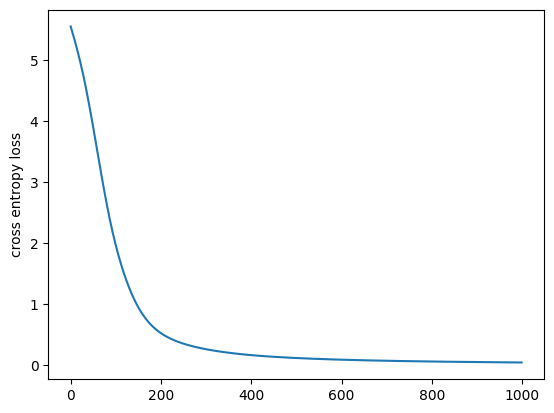

In [ ]:
# 맷플롯립을 통한 오차가 줄어드는 모습 확인
plt.plot(log)
plt.ylabel('cross entropy loss')
plt.show()

### IMDB를 활용한 RNN 구현

In [ ]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

Field는 데이터 전처리를 위해 사용되며 여기에서 사용되는 파라미터는 다음과 같습니다.

```
torchtext.data.Field(lower=True, fix_length=200, batch_first=False)
```

- lower : 대문자를 모두 소문자로 변경. 기본값은 False
- fix_length : 고정된 길이의 데이터를 얻을 수 있음. 여기에서는 데이터의 길이를 200으로 고정했으며, 200보다 짧으면 패딩 작업(padding)을 통해 200으로 맞추어줌.

- batch_frist : 신경망에 입력되는 텐서의 첫번째 차원 값이 배치 크기(batch_size)가 되도록 합니다. 기본값은 false.

- 모델의 네트워크로 입력되는 데이터는 [시퀀스 길이, 배치 크기, 은닉층의 뉴런 개수]([seq_len, batch_size, hidden_size]) 형태.
  - batch_size = True로 설정하면 [배치크기, 시퀀스 길이, 은닉층뉴런 개수] ([batch_size, seq_len, hidden_size]) 형태로 변경.
  - batch_size = True와 무관하게, [은닉층 개수, 배치 크기, 은닉층의 뉴런 개수] (num_layers, batch, hidden_size)



In [ ]:
start=time.time()
TEXT = torchtext.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL =torchtext.data.Field(sequential=False)



```
torchtext.data.Field(sequential=False)
```

seqential : 데이터에 순서(sequenatial)이 있는지를 나타냄. 



In [ ]:
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)

- split : 텍스트(text)와 레이블(label)로 분할.

In [ ]:
print(vars(train_data.examples[0]))

{'text': ['i', "haven't", 'seen', 'this', 'in', 'over', '20yrs', 'but', 'i', 'still', 'remember', 'things', 'about', 'it.<br', '/><br', '/>this', 'film', 'could', 'not', 'have', 'been', 'made', 'in', 'color.', 'the', 'stark', 'grays', 'are', 'what', 'make', 'it,', 'and', 'was', 'life', 'really', 'that', 'simple', 'in', 'the', "1950's??", 'what', 'stands', 'out', 'the', 'most', 'in', 'my', 'memory', 'is', 'perry', 'smith', 'going', 'to', 'the', 'gallows.', 'his', 'breathing', 'under', 'the', 'hood', 'just', 'before', 'they', 'sprung', 'the', 'trap.', 'i', "don't", 'think', 'i', 'could', 'watch', 'that', 'again.....once', 'is', 'plenty.', "it's", 'like', 'that', 'unnamed', 'guy', 'at', 'the', 'beginning', 'of', '"papillon"', 'who', 'is', 'dragged', 'out', 'in', 'terror', 'to', 'the', 'guillotine.', 'the', 'guy', 'that', 'said', 'watch', 'this', 'on', 'a', 'double', 'bill', 'with', '"dead', 'man', 'walking"', 'should', 'have', 'added', 'the', 'last', '10', 'minutes', 'of', '"i', 'want', '

- text와 label을 갖는 사전 형식(dict type)으로 구성되어 있음.

In [ ]:
import string

for example in train_data.examples:
    text = [x.lower() for x in vars(example)['text']] 
    text = [x.replace("<br","") for x in text] 
    text = [''.join(c for c in s if c not in string.punctuation) for s in text] 
    text = [s for s in text if s] 
    vars(example)['text'] = text
    
for example in test_data.examples:
    text = [x.lower() for x in vars(example)['text']]
    text = [x.replace("<br","") for x in text]
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    text = [s for s in text if s]
    vars(example)['text'] = text

- 전처리 코드를 진행. 공백처리, 불필요한 문자 제거 등이 포함됨.

In [ ]:
import random
train_data, valid_data = train_data.split(random_state = random.seed(0), split_ratio=0.8)

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20000
Number of validation examples: 5000
Number of testing examples: 25000


- 단어 집합을 만들어 보겠습니다.
  - IMDB 데이터셋에 포함된 단어들을 이용하여 하나의 딕셔너리와 같은 집합을 만드는 것으로 이해하자.
  - 단어 집합을 만들 때, 단어들의 중복은 제거된 상태에서 진행합니다.

In [ ]:
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 10002
Unique tokens in LABEL vocabulary: 3


```
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
```

- train_data : 훈련 데이터셋
- max_size : 단어 집합의 크기로 단어 집합에 포함되는 어휘 수
- min_freq : 훈련 데이터셋에서 특정 단어의 최소 등장 횟수
- vectors : 임베딩 벡터를 지정할 수 있음. 임베딩 벡터는 워드 임베딩의 결과로 나온 벡터. / pytorch에서도 nn.embedding()을 통해 단어를 랜덤한 숫자 값으로 변환한 후 가중치를 학습하는 방법을 제공함.



In [ ]:
print(LABEL.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f18653d2350>>, {'<unk>': 0, 'pos': 1, 'neg': 2})


In [ ]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100
hidden_size = 300

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device)

- BucketIterator : dataloader와 쓰임새가 같습니다.
  - 즉, 배치 크기 단위로 값을 차례대로 꺼내어 메모리로 가져오고 싶을 때 사용.
  - Field에서 fix_length를 사용하지 않았다면, BuckIterator에서 데이터의 길이를 조정할 수 있음.
  - BucketIterator는 비슷한 길이의 데이터를 한 배치에 할당하여 패딩(Padding)을 최소화시켜줌.

- nn.embedding()을 이용하여 임베딩 처리를 진행해 보자.

In [ ]:
class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)

    def forward(self, inputs):
        bz = inputs.shape[1]
        ht = torch.zeros((bz, hidden_size)).to(device)

        for word in inputs:
            ht = self.rnn(word, ht) #재귀적으로 발생하는 상태 값을 처리하기 위한 구문.
        return ht

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
        self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 3)

    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = Net()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0

    model.train()
    for b in trainloader:
        x, y = b.text, b.label
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total

    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0

    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()

    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total

    print('epoch: ', epoch,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [ ]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model,train_iterator,valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)

epoch:  0 loss：  0.011 accuracy: 0.494 valid_loss：  0.011 valid_accuracy: 0.507
epoch:  1 loss：  0.011 accuracy: 0.504 valid_loss：  0.011 valid_accuracy: 0.5
epoch:  2 loss：  0.011 accuracy: 0.511 valid_loss：  0.011 valid_accuracy: 0.494
epoch:  3 loss：  0.011 accuracy: 0.517 valid_loss：  0.011 valid_accuracy: 0.493
epoch:  4 loss：  0.011 accuracy: 0.527 valid_loss：  0.011 valid_accuracy: 0.511
273.1426305770874


In [ ]:
def evaluate(epoch, model, testloader):    
    test_correct = 0
    test_total = 0
    test_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ', epoch,
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

In [ ]:
epochs = 5
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch,
                                               model,
                                               test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

epoch:  0 test_loss：  0.011 test_accuracy: 0.503
epoch:  1 test_loss：  0.011 test_accuracy: 0.503
epoch:  2 test_loss：  0.011 test_accuracy: 0.503
epoch:  3 test_loss：  0.011 test_accuracy: 0.503
epoch:  4 test_loss：  0.011 test_accuracy: 0.503
313.01343297958374


### RNN 계층적 구현
  - 미세한 차이만 있다.

In [ ]:
!pip install torchtext==0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 554.2 kB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [ ]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [ ]:
start=time.time()
TEXT = torchtext.data.Field(sequential = True, batch_first = True, lower = True)
LABEL = torchtext.data.Field(sequential = False, batch_first = True) 

In [ ]:
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(split_ratio = 0.8)

TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

BATCH_SIZE = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device)

-  vocab_size : 영화 리뷰에 대한 텍스트 길이, 
- n_classes : 레이블(긍정,부정)값을 지정.


In [ ]:
vocab_size = len(TEXT.vocab)
n_classes = 2  



```
self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers = self.n_layers, batch_first = True)
```

- embed_dim : 훈련 데이터셋의 특성(feature) 개수(칼럼 갯수)
- self.hidden_dim : 은닉 계층의 뉴런(유닛) 개수
- num_layers : RNN 계층의 갯수
- batch_first : 기본값은 Flase, 입력 데이터의 형태는 (시퀀스의 길이, 배치 크기, 특성 개수)입니다. True로 설정하게 되면, 배치 크기가 맨 앞으로 오게 되며, (배치 크기, 시퀀스의 길이, 특성 개수) 형태가 됨.



In [ ]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p = 0.2):
        super(BasicRNN, self).__init__()
        self.n_layers = n_layers 
        self.embed = nn.Embedding(n_vocab, embed_dim) 
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers = self.n_layers, batch_first = True) 
        self.out = nn.Linear(self.hidden_dim, n_classes) 

    def forward(self, x):
        x = self.embed(x) 
        h_0 = self._init_state(batch_size = x.size(0)) 
        x, _ = self.rnn(x, h_0) 
        h_t = x[:, -1, :] 
        self.dropout(h_t)
        logit = torch.sigmoid(self.out(h_t))
        return logit

    def _init_state(self, batch_size = 1):
        weight = next(self.parameters()).data 
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [ ]:
model = BasicRNN(n_layers = 1, hidden_dim = 256, n_vocab = vocab_size, embed_dim = 128, n_classes = n_classes, dropout_p = 0.5)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) #뺄셈에 대한 함수, 함수명에 '_'이 붙은 것은 inplace 연산을 하겠다는 의미.
        optimizer.zero_grad()

        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

        if b % 50 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(e,
                                                                           b * len(x),
                                                                           len(train_iter.dataset),
                                                                           100. * b / len(train_iter),
                                                                           loss.item()))

In [ ]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0

    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) 
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction = "sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy



```
corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
```

- max(1)[1] : max(dim=0)[0]은 최댓값을 나타내고, max(dim=0)[1] 최댓값을 갖는 데이터의 인덱스를 나타냄.

- view(y.size()) : logit.max(1)[1] 결과는 y.size() 크기로 변경.

-  data == y.data : 모델의 예측 결과(logit.max(1)[1].view(y.size()).data)가 레이블(실제값, y.data)과 같은지 확인함.

- sum() : 모델의 예측 결과와 레이블(실제값)이 같으면 그 합을 corrects 변수에 누적하여 저장.



In [ ]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5
for e in range(1, EPOCHS + 1):
    train(model, optimizer, train_iterator)
    val_loss, val_accuracy = evaluate(model, valid_iterator)
    print("[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f" % (e, val_loss, val_accuracy))

Train Epoch: 1 [0/20000 (0%)]	Loss: 0.695275
Train Epoch: 1 [5000/20000 (25%)]	Loss: 0.699182
Train Epoch: 1 [10000/20000 (50%)]	Loss: 0.701557
Train Epoch: 1 [15000/20000 (75%)]	Loss: 0.696948
[EPOCH: 1], Validation Loss:  0.69 | Validation Accuracy:  0.48
Train Epoch: 2 [0/20000 (0%)]	Loss: 0.696892
Train Epoch: 2 [5000/20000 (25%)]	Loss: 0.690230
Train Epoch: 2 [10000/20000 (50%)]	Loss: 0.694637
Train Epoch: 2 [15000/20000 (75%)]	Loss: 0.693824
[EPOCH: 2], Validation Loss:  0.69 | Validation Accuracy:  0.49
Train Epoch: 3 [0/20000 (0%)]	Loss: 0.690381
Train Epoch: 3 [5000/20000 (25%)]	Loss: 0.692152
Train Epoch: 3 [10000/20000 (50%)]	Loss: 0.693827
Train Epoch: 3 [15000/20000 (75%)]	Loss: 0.692619
[EPOCH: 3], Validation Loss:  0.69 | Validation Accuracy:  0.48
Train Epoch: 4 [0/20000 (0%)]	Loss: 0.692208
Train Epoch: 4 [5000/20000 (25%)]	Loss: 0.692768
Train Epoch: 4 [10000/20000 (50%)]	Loss: 0.702437
Train Epoch: 4 [15000/20000 (75%)]	Loss: 0.692688
[EPOCH: 4], Validation Loss:  0.

In [ ]:
test_loss, test_acc = evaluate(model,test_iterator)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.69 | Test Accuracy:  0.58


# LSTM

### Model

이제는 시계열 데이터 모델링을 위한 LSTM 모델을 구현해줄 차례입니다. LSTM (Long Short-Term Memory) 는 입력 시퀀스의 타임 스텝 $t$에 따라 hidden state $h_t$, cell state $c_t$에 따른 출력을 Equation 1과 같이 계산합니다. Equation 1의 $i_t, f_t, g_t, o_t$는 각각 input, forget, cell, output 게이트이며 $\sigma$는 sigmoid 함수를 말합니다.


<img src='https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_W640.jpg'>

Pytorch 에서는 torch.nn 모듈에서 LSTM 클래스를 쉽게 호출할 수 있습니다. LSTM 클래스 생성시 필요한 파라미터는 다음과 같습니다. "num_layer" 아규먼트를 통해 Multi-layer LSTM을 쉽게 구성할 수 있으며 "num_layer"가 2 이상일 경우, 타임스텝 $t$, layer $l$에 대한 입력으로는 ($x_t^l, l \geq 2$) $h_t^{l-1}$에 dropout이 적용된 텐서가 적용됩니다.

- input_size : 입력 $x$의 feature차원
- hidden_size : hidden_feature 차원
- num_layers : LSTM 층의 개수로 2개 이상일 경우 bais항을 추가할지 말지를 결정.
- bias : default : True / bais 항을 추가할지 말지를 결정.
- batch_frist : default : False, True일 경우 입력, 출력 모두 [배치사이즈, 입력 길이, feature 차원] 으로 구성되고 fasle일 경우 입력, 출력 모두 [입력 길이, 배치 사이즈, feature 차원]이 됨. 이러한 텐서 차원 순서는 hidden/cell state에는 적용되지 않습니다.

- dropout : 마지막 layer의 출력을 제외하고 dropout을 적용함.

LSTM 모델을 사용할 때 주의할 점은 각 타임스텝 별로 hidden / cell state 가 업데이트되는 구조로 동작하기 때문에 초기 $h_0, c_0$를 목적에 맞게 선언해줄 수 있다는 점입니다 각각 [$D$*num_layers, 배치 사이즈, feature 차원] 크기로 되어있고 $D$는 bi-directional 일 경우 2, one-directional 일 경우 1이고 따로 제공되지 않을 경우 디폴트는 0으로 할당됩니다. 또한, 입력, 출력의 텐서 구조는 "batch_first" 아규먼트가 True / False 여부에 따라 배치 차원이 어디에 위치할지 결정됩니다. 일반적으로 배치 차원은 맨 앞에 있는 것이 편리하므로 "batch_first=True"로 설정하는 것이 낫습니다.

LSTM 모델에 대해서 forward 함수를 진행할 경우 출력은 "output, $(h_n, c_n)$" 이 됩니다. 출력텐서는 ("output") "batch_first" 아규먼트에 따라 True일 경우 [배치 사이즈, 입력 길이, $D$*feature 차원] 으로 구성되며 각 타임스텝 $t$에 따른 마지막 LSTM layer의 $h_t$를 담습니다. $h_n, c_n$의 크기는 [$D$*num_layers, 배치 사이즈, feature 차원] 으로 구성되며 마지막 타임스텝의 hidden / cell state가 담깁니다

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [ ]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))
])

In [ ]:
from torchvision.datasets import MNIST

download_root = 'MNIST_DATASET/'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 471818598.29it/s]

Extracting MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_DATASET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37538175.96it/s]


Extracting MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142284726.10it/s]


Extracting MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_DATASET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24114593.38it/s]

Extracting MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_DATASET/MNIST/raw



In [ ]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
    
    def forward(self, x, hidden):        
        hx, cx = hidden        
        x = x.view(-1, x.size(1))
        
        gates = self.x2h(x) + self.h2h(hx)    
        gates = gates.squeeze()        
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        
        ingate = F.sigmoid(ingate)
        forgetgate = F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        
        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate)        
        hy = torch.mul(outgate, F.tanh(cy))        
        return (hy, cy)



```
self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
```

- 왜 4 *hidden_size가 사용되고 있을까요?

<img src='https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_W640.jpg'>

- 게이트는 망각, 입력, 셀, 출력으로 구성되어 있다.






```
gates = F.linear(input, w_ih, b_ih) + F.linear(hx, w_hh, b_hh)
```

앞의 F.linear
- input : 입력층으로 입력되는 훈련 데이터셋의 특성(feature) 수(Column 수)
- w_ih : 입력층과 은닉층 사이의 가중치
- b_ih : 입력층과 은닉층 사이의 바이어스

뒤의 F.linear
- hx : 은닉층의 뉴런/유닛 개수(은닉층의 특성(feature) 개수)
- w_hh : 은닉층과 은닉층 사이의 가중치
- b_hh : 은닉층과 은닉층 사이의 바이어스



In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
         
        self.layer_dim = layer_dim               
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)          
        self.fc = nn.Linear(hidden_dim, output_dim)
         
    def forward(self, x):        
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))
                           
        outs = []        
        cn = c0[0,:,:]
        hn = h0[0,:,:]

        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn)) 
            outs.append(hn)
                
        out = outs[-1].squeeze()        
        out = self.fc(out) 
        return out

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  
output_dim = 10
 
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
seq_dim = 28 
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):          
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
          
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()        
        loss_list.append(loss.item())
        iter += 1
         
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                 
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
             
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.237457275390625. Accuracy: 21.420000076293945
Iteration: 1000. Loss: 0.9968994855880737. Accuracy: 74.94999694824219
Iteration: 1500. Loss: 0.42673957347869873. Accuracy: 88.13999938964844
Iteration: 2000. Loss: 0.30981600284576416. Accuracy: 93.56999969482422
Iteration: 2500. Loss: 0.0558248832821846. Accuracy: 95.69000244140625
Iteration: 3000. Loss: 0.09873700886964798. Accuracy: 95.58000183105469
Iteration: 3500. Loss: 0.08254366368055344. Accuracy: 96.8499984741211
Iteration: 4000. Loss: 0.03308983892202377. Accuracy: 97.08000183105469
Iteration: 4500. Loss: 0.049307383596897125. Accuracy: 97.08000183105469
Iteration: 5000. Loss: 0.08068697154521942. Accuracy: 96.69999694824219
Iteration: 5500. Loss: 0.12790139019489288. Accuracy: 97.30999755859375
Iteration: 6000. Loss: 0.007093742024153471. Accuracy: 97.66000366210938
Iteration: 6500. Loss: 0.011727366596460342. Accuracy: 97.63999938964844
Iteration: 7000. Loss: 0.008610538206994534. Accuracy: 98.06999969

In [ ]:
def evaluate(model, val_iter):    
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)
        labels = labels.cuda()        
        logit = model(images).cuda()
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [ ]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


## GRU
- GRU는 기존 LSTM의 구조를 조금 더 간단하게 개선한 모델입니다. 그리고 모델의 대략적인 구조와 수식은 아래와 같습니다.

-   LSTM의 경우 forget gate, input gate, output gate 3개의 gate가 있었지만, GRU에서는 reset gate, update gate 2개의 gate만을 사용합니다. 또한 cell state, hidden state가 합쳐져 하나의 hidden state로 표현하고 있습니다. 
  - Reset Gate : 이전 시점의 hidden state와 현 시점의 x를 활성화함수 시그모이드를 적용하여 구하는 방식입니다. 결과값은 0~1 사이의 값을 가질 것이며 이전 hidden state의 값을 얼마나 활용할 것인지에 대한 정보로 해석할 수 있을 것입니다.
  
  - Update Gate : STM의 input, forget gate와 비슷한 역할을 하며 과거와 현재의 정보를 각각 얼마나 반영할지에 대한 비율을 구하는 것이 핵심

-  GRU는 기존 LSTM에 비해 더 간단한 구조를 가지고 있습니다. 그리고 마지막 출력값에 활성화함수를 적용하지 않습니다. 성능 면에서는 LSTM과 비교해서 우월하다고 할 수 없지만 학습할 파라미터가 더 적은 것이 장점이라고 할 수 있습니다.|



<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png'>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [ ]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))
])

In [ ]:
from torchvision.datasets import MNIST
download_root = 'MNIST_DATASET/'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 217118013.28it/s]

Extracting MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_DATASET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 108739402.00it/s]


Extracting MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 171861817.46it/s]


Extracting MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_DATASET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 25366882.51it/s]

Extracting MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_DATASET/MNIST/raw



In [ ]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 3 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 3 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
    
    def forward(self, x, hidden):        
        x = x.view(-1, x.size(1))
        
        gate_x = self.x2h(x) 
        gate_h = self.h2h(hidden)
        
        gate_x = gate_x.squeeze()
        gate_h = gate_h.squeeze()
        
        i_r, i_i, i_n = gate_x.chunk(3, 1)
        h_r, h_i, h_n = gate_h.chunk(3, 1)
                
        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_i + h_i)
        newgate = F.tanh(i_n + (resetgate * h_n))
        
        hy = newgate + inputgate * (hidden - newgate)              
        return hy

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim               
        self.gru_cell = GRUCell(input_dim, hidden_dim, layer_dim)                
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
                
        outs = []        
        hn = h0[0,:,:]
        
        for seq in range(x.size(1)):
            hn = self.gru_cell(x[:,seq,:], hn) 
            outs.append(hn)
            
        out = outs[-1].squeeze()        
        out = self.fc(out) 
        return out

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  
output_dim = 10
 
model = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)
 
if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
seq_dim = 28 
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):         
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
          
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        iter += 1
         
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
             
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.6616928577423096. Accuracy: 43.59000015258789
Iteration: 1000. Loss: 0.8945668339729309. Accuracy: 76.19999694824219
Iteration: 1500. Loss: 0.29147759079933167. Accuracy: 89.7300033569336
Iteration: 2000. Loss: 0.23627927899360657. Accuracy: 93.51000213623047
Iteration: 2500. Loss: 0.03288726136088371. Accuracy: 95.05000305175781
Iteration: 3000. Loss: 0.030374974012374878. Accuracy: 95.81999969482422
Iteration: 3500. Loss: 0.16210567951202393. Accuracy: 96.33999633789062
Iteration: 4000. Loss: 0.19308766722679138. Accuracy: 96.19000244140625
Iteration: 4500. Loss: 0.051720067858695984. Accuracy: 97.0
Iteration: 5000. Loss: 0.13900163769721985. Accuracy: 97.26000213623047
Iteration: 5500. Loss: 0.08090294152498245. Accuracy: 97.62000274658203
Iteration: 6000. Loss: 0.10488356649875641. Accuracy: 97.69000244140625
Iteration: 6500. Loss: 0.07984025031328201. Accuracy: 97.80000305175781
Iteration: 7000. Loss: 0.10250380635261536. Accuracy: 97.55999755859375
Iterati

In [ ]:
def evaluate(model, val_iter):    
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)
        labels = labels.cuda()
        logit = model(images).cuda()
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [ ]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


# Transformer 참고 : https://cpm0722.github.io/pytorch-implementation/transformer